In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_ods_reader import read_ods
from pyexcel import get_book
import re, string

In [43]:
#read file
file = r'MasterFile - Year 2017.ods'
sheet = get_book(file_name=file)
sheet_list = sheet.sheet_names()
sheet_list.remove('Notes')
data = {name: read_ods(file, name) for name in sheet_list}
sheet_list

['G33L Abdominal ',
 'G33L Breasst ',
 'G33L H&N',
 'G33L Prostate',
 'G32G Abdominal',
 'G32G Breast',
 'G32G H&N',
 'G32G Prostate',
 'Diff Abdominal',
 'Diff Breast',
 'Diff H&N',
 'Diff Prostate']

In [22]:
#show data
data['G33L Abdominal '].head()

,ID,DMES,DCAL,G33L,CLG33L,DIFF,MR,050817150228,unnamed3
0,1.0,1.798717,1.778,0.971,0.04855,NaN,NaN,Gamma average,0.972400
1,2.0,1.779716,1.816,0.968,0.09695,0.003,NaN,STAN-DEV,0.000558
2,3.0,1.762920,1.786,0.999,0.14690,0.031,0.001789,β,6.000000
3,4.0,2.023142,1.991,0.961,0.19495,0.038,0.003789,T,1.000000
4,5.0,2.100162,2.069,0.998,0.24485,0.037,0.005737,Width AL,0.217966


In [45]:
#correct column names
for sheet_name in sheet_list:
    new_column_names = [re.sub('[\W_]', '', name) for name in data[sheet_name].columns.values.tolist()]
    new_column_names[-2:] = ['statistics', 'values']
    data[sheet_name].columns = new_column_names
    
data['Diff Breast'].head()

,ID,DMES,DCAL,DIFF,CLDIFF,DIFFMESURA,MR,statistics,values
0,1.0,1.603585,1.596,0.004753,0.000238,NaN,NaN,G33L Media,0.009988
1,2.0,1.592906,1.574,0.012011,0.000838,0.007258,NaN,STAN-DEV,0.000347
2,3.0,1.567110,1.528,0.025595,0.002118,0.013584,0.001097,β,6.000000
3,4.0,1.558692,1.503,0.037054,0.003971,0.011459,0.001700,T,0.000000
4,5.0,1.439756,1.432,0.005416,0.004241,0.031638,0.003365,Width AL,0.126873


In [49]:
#plotting function
def plot_sequence(name):
    CL = data[name]['values'][11]
    LCL = data[name]['values'][12]
    AL = data[name]['values'][13]
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    ax.plot(data[name].ID, data[name].G33L, 'o-', label="$\gamma$33L")
    ax.set_ylim(0.7, 1.05)
    ax.set_xlabel(r"Measurement Number")
    ax.set_ylabel(r"Gamma 3% 3mm")

    ax.axhline(y = CL, xmin=0, xmax=20, color="green", linestyle='-', linewidth=1, label='CentL')
    ax.axhline(y = LCL, xmin=0, xmax=20, color="magenta", linestyle='--', linewidth=1, label='LCL')
    ax.axhline(y = AL, xmin=0, xmax=20, color="red", linestyle=(0, (5,10)), linewidth=1, label='AL')
    
    ax.legend(bbox_to_anchor=(1.0,1), loc="upper left")
    
    return ax, fig

(<matplotlib.axes._subplots.AxesSubplot at 0x9a14090>,
 <Figure size 432x288 with 1 Axes>)

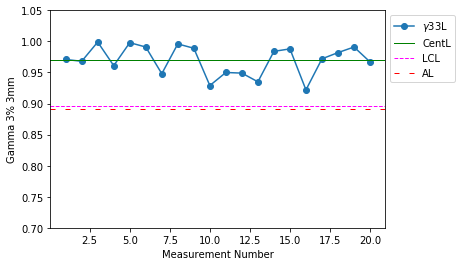

In [50]:
plot_sequence("G33L Abdominal ")